In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
classification_problem = datasets.make_classification(n_features=2, n_informative=2,
                                                     n_classes=3, n_redundant=0,
                                                     n_clusters_per_class=1, random_state=3)

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

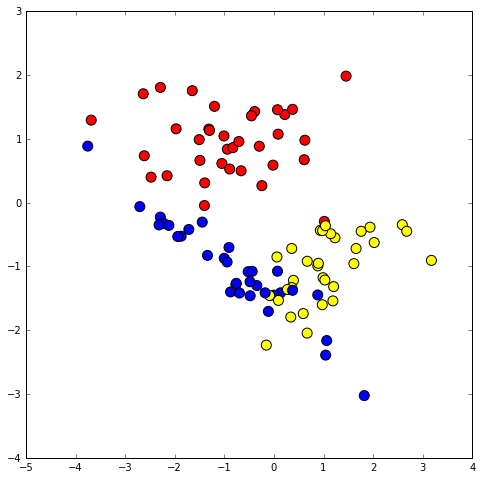

In [6]:
pylab.figure(figsize=(8, 8))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])),
              list(map(lambda x: x[1], classification_problem[0])),
             c=classification_problem[1], cmap=colors, s=100)

In [8]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0],
                                                                                    classification_problem[1],
                                                                                    test_size=0.3,
                                                                                    random_state=1) 

# decision tree classifier

In [9]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [10]:
prediction = clf.predict(test_data)
metrics.accuracy_score(test_labels, prediction)

0.69999999999999996

# meshes

In [11]:
def get_meshgrid(data, step=0.05, border=0.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
    

In [13]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                         colors=colors, light_colors=light_colors):
    estimator.fit(train_data, train_labels)
    
    pyplot.figure(figsize=(16, 8))
    
    pyplot.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_prediction = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_prediction, cmap=light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    pyplot.subplot(1, 2, 2)
    pyplot.pcolormesh(xx, yy, mesh_prediction, cmap=light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))
    

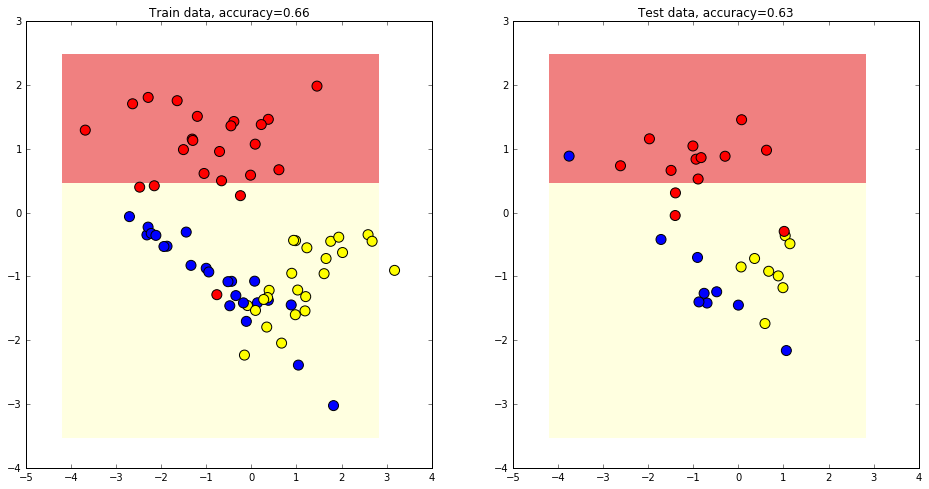

In [16]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, max_depth=1), 
                      train_data, train_labels, test_data, test_labels)

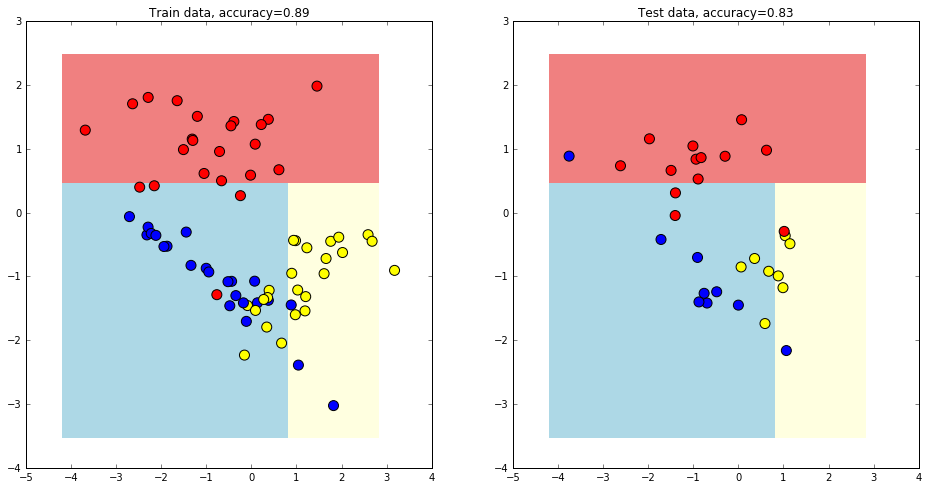

In [17]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, max_depth=2), 
                      train_data, train_labels, test_data, test_labels)

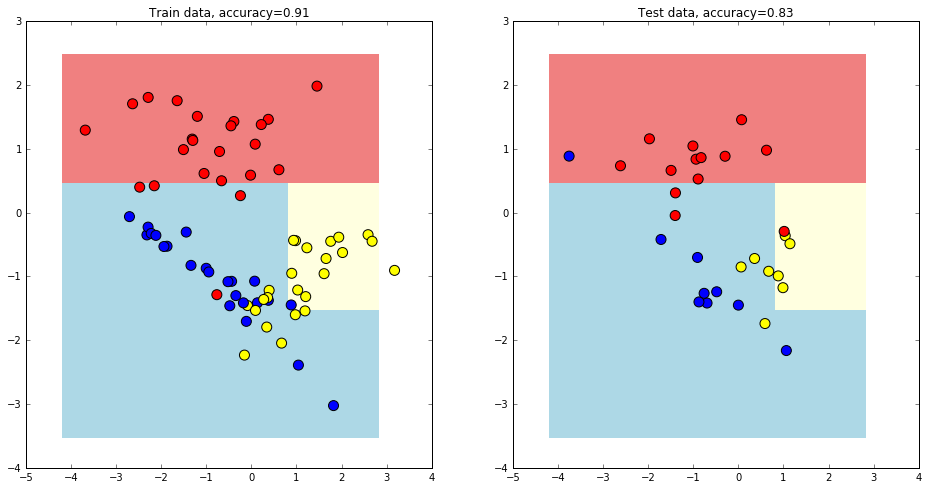

In [19]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, max_depth=3), 
                      train_data, train_labels, test_data, test_labels)

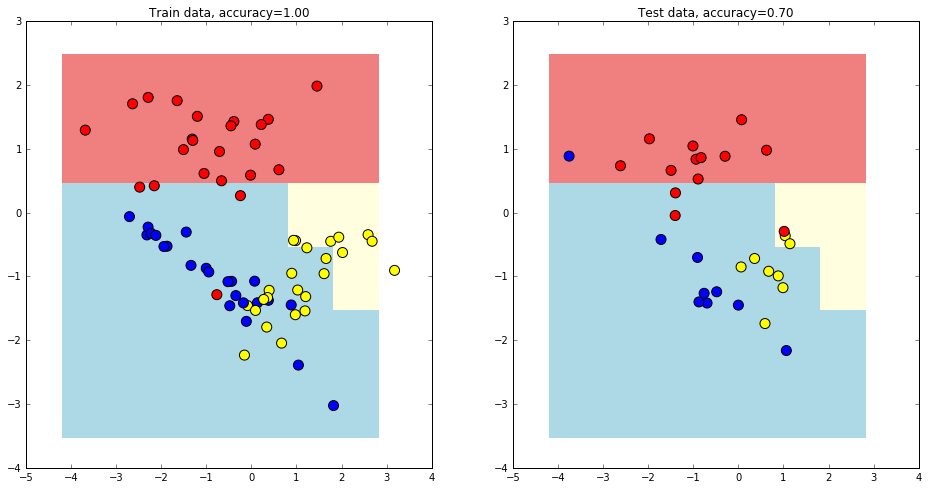

In [22]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1), 
                      train_data, train_labels, test_data, test_labels)

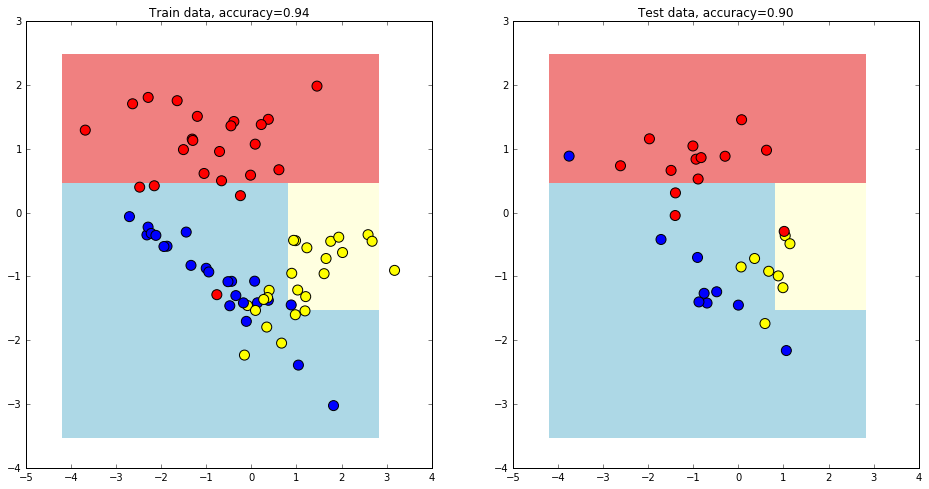

In [26]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=3), 
                      train_data, train_labels, test_data, test_labels)